<a href="https://colab.research.google.com/github/Rohanpeerla/Module-9-Lab-1/blob/master/Module_9_Lab_1_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [1000/5000], Loss: 0.2430
Epoch [2000/5000], Loss: 0.0601
Epoch [3000/5000], Loss: 0.0274
Epoch [4000/5000], Loss: 0.0167
Epoch [5000/5000], Loss: 0.0117


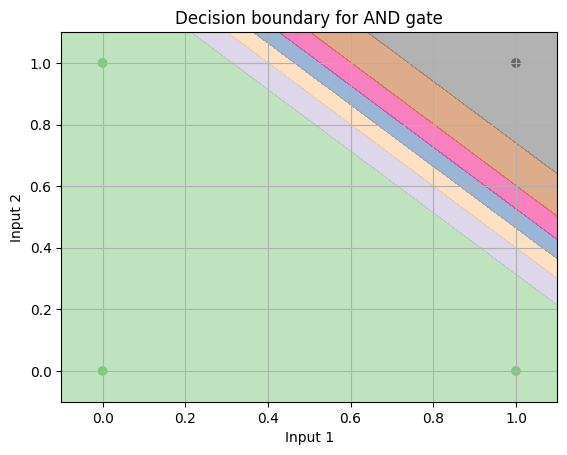

Epoch [1000/5000], Loss: 0.2049
Epoch [2000/5000], Loss: 0.0482
Epoch [3000/5000], Loss: 0.0229
Epoch [4000/5000], Loss: 0.0143
Epoch [5000/5000], Loss: 0.0101


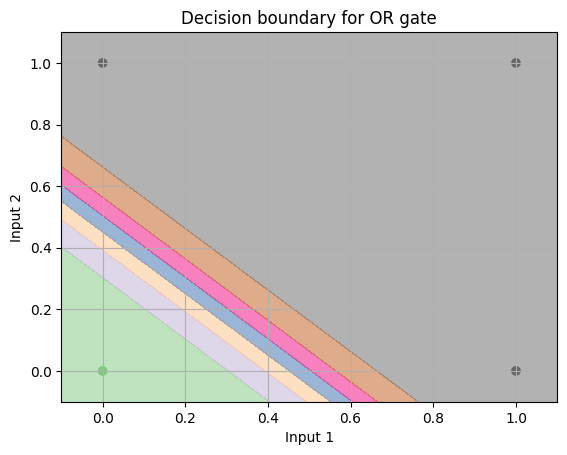

Epoch [1000/5000], Loss: 0.1816
Epoch [2000/5000], Loss: 0.0438
Epoch [3000/5000], Loss: 0.0204
Epoch [4000/5000], Loss: 0.0126
Epoch [5000/5000], Loss: 0.0089


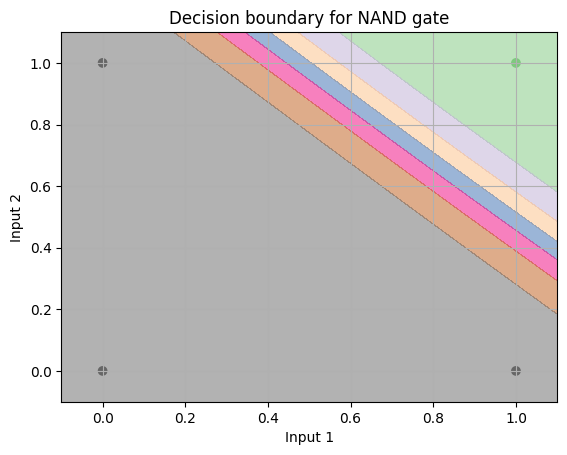

Epoch [1000/5000], Loss: 0.1766
Epoch [2000/5000], Loss: 0.0450
Epoch [3000/5000], Loss: 0.0219
Epoch [4000/5000], Loss: 0.0137
Epoch [5000/5000], Loss: 0.0098


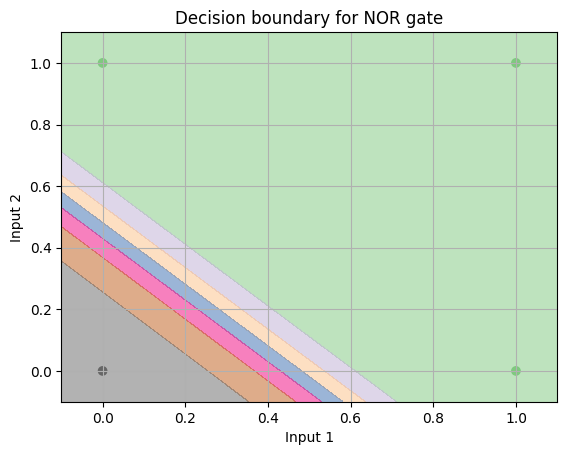

In [1]:
#1.Try using the MLP classifier for different logic gates other than XOR like AND, OR, NOR etc.
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

logic_gates = {
    "AND": {"X": torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float), "Y": torch.tensor([[0],[0],[0],[1]], dtype=torch.float)},
    "OR": {"X": torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float), "Y": torch.tensor([[0],[1],[1],[1]], dtype=torch.float)},
    "NAND": {"X": torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float), "Y": torch.tensor([[1],[1],[1],[0]], dtype=torch.float)},
    "NOR": {"X": torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float), "Y": torch.tensor([[1],[0],[0],[0]], dtype=torch.float)},
}

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

def train_and_plot(logic_gate, model, epochs=5000, lr=0.1):
    X = logic_gates[logic_gate]["X"]
    Y = logic_gates[logic_gate]["Y"]

    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    plt.figure()
    X_np = X.numpy()
    Y_np = Y.numpy()
    plt.scatter(X_np[:, 0], X_np[:, 1], c=Y_np.flatten(), cmap=plt.cm.Accent, marker='o')
    plt.title(f"Decision boundary for {logic_gate} gate")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.grid(True)

    x_min, x_max = X_np[:, 0].min() - 0.1, X_np[:, 0].max() + 0.1
    y_min, y_max = X_np[:, 1].min() - 0.1, X_np[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float)).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Accent)
    plt.show()

input_size = 2
hidden_size = 3
output_size = 1

for logic_gate in logic_gates.keys():
    model = MLP(input_size, hidden_size, output_size)
    train_and_plot(logic_gate, model)


Epoch [1000/5000], Loss: 0.2500
Epoch [2000/5000], Loss: 0.2500
Epoch [3000/5000], Loss: 0.2500
Epoch [4000/5000], Loss: 0.2500
Epoch [5000/5000], Loss: 0.2500


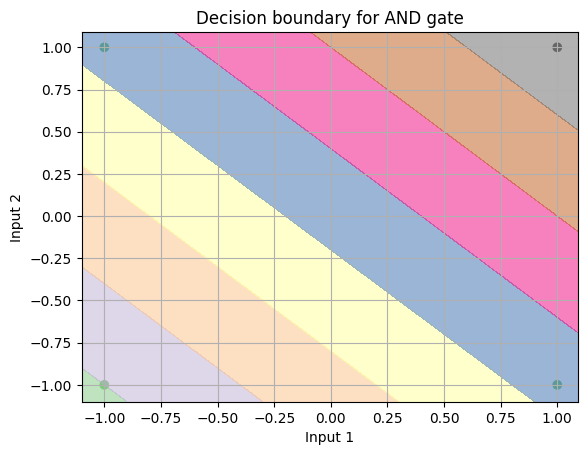

Epoch [1000/5000], Loss: 0.2500
Epoch [2000/5000], Loss: 0.2500
Epoch [3000/5000], Loss: 0.2500
Epoch [4000/5000], Loss: 0.2500
Epoch [5000/5000], Loss: 0.2500


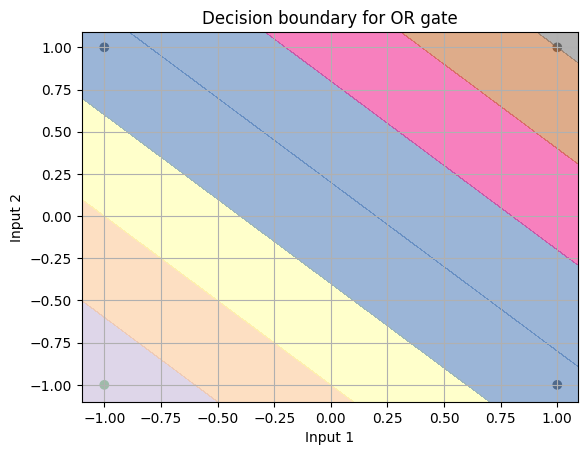

Epoch [1000/5000], Loss: 0.2500
Epoch [2000/5000], Loss: 0.2500
Epoch [3000/5000], Loss: 0.2500
Epoch [4000/5000], Loss: 0.2500
Epoch [5000/5000], Loss: 0.2500


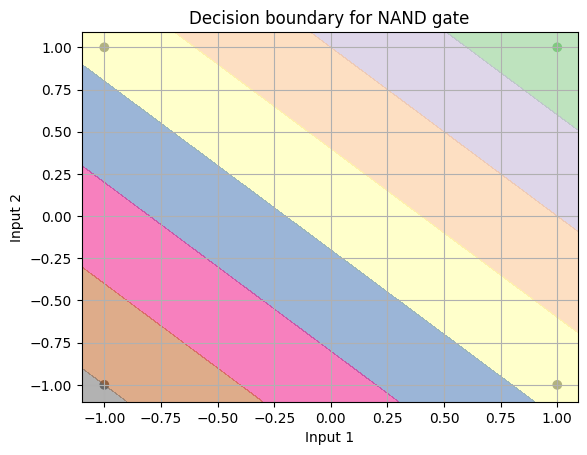

Epoch [1000/5000], Loss: 0.2500
Epoch [2000/5000], Loss: 0.2500
Epoch [3000/5000], Loss: 0.2500
Epoch [4000/5000], Loss: 0.2500
Epoch [5000/5000], Loss: 0.2500


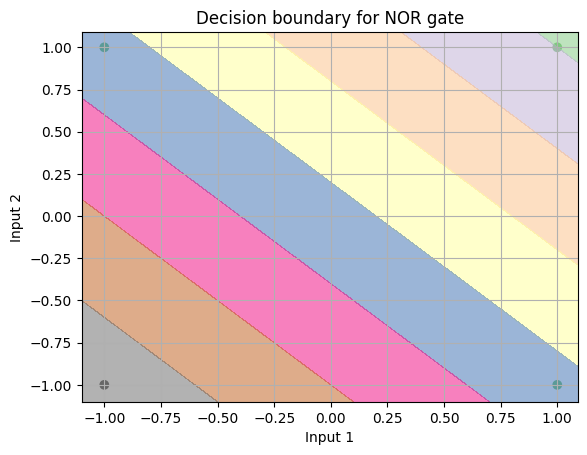

Epoch [1000/5000], Loss: 0.8533
Epoch [2000/5000], Loss: 0.7653
Epoch [3000/5000], Loss: 0.7571
Epoch [4000/5000], Loss: 0.7544
Epoch [5000/5000], Loss: 0.7532


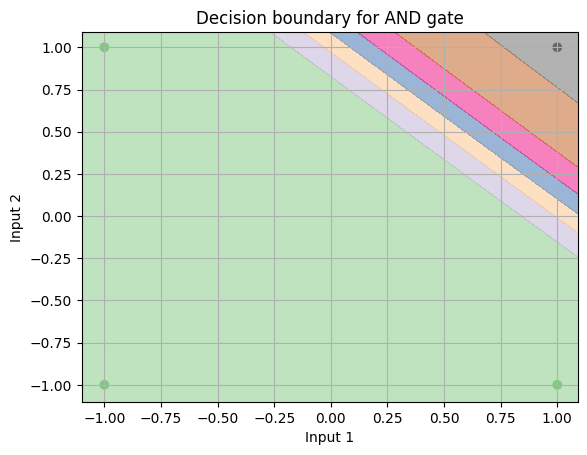

Epoch [1000/5000], Loss: 0.2783
Epoch [2000/5000], Loss: 0.2592
Epoch [3000/5000], Loss: 0.2552
Epoch [4000/5000], Loss: 0.2536
Epoch [5000/5000], Loss: 0.2527


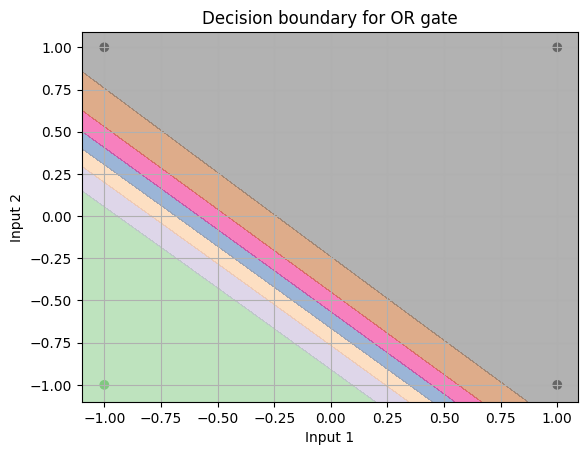

Epoch [1000/5000], Loss: 0.2790
Epoch [2000/5000], Loss: 0.2598
Epoch [3000/5000], Loss: 0.2557
Epoch [4000/5000], Loss: 0.2539
Epoch [5000/5000], Loss: 0.2530


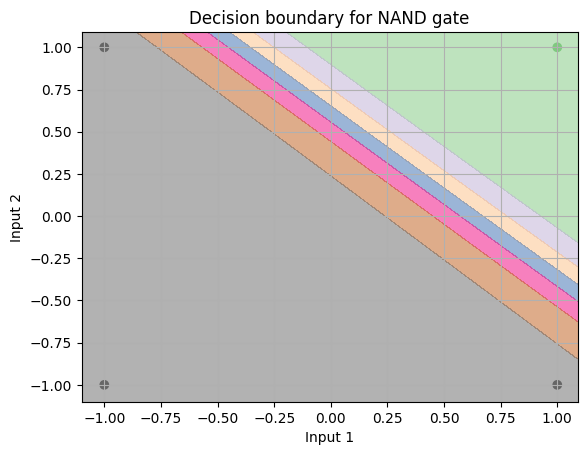

Epoch [1000/5000], Loss: 1.0009
Epoch [2000/5000], Loss: 0.9904
Epoch [3000/5000], Loss: 0.8452
Epoch [4000/5000], Loss: 0.7693
Epoch [5000/5000], Loss: 0.7589


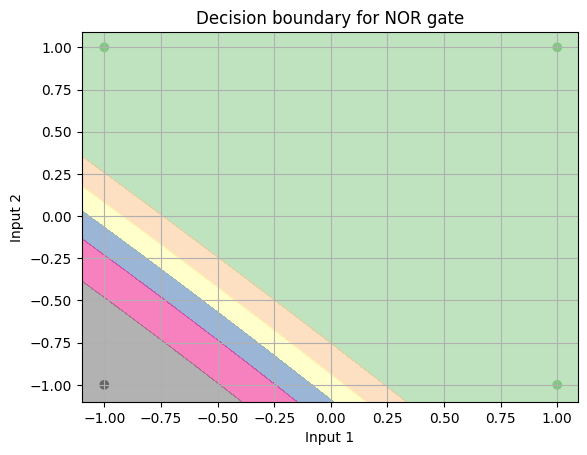

In [2]:
#2.Try to change 0/1 logic to -1/+1 logic. What happens with an SLP in this case? What about an MLP?
logic_gates = {
    "AND": {"X": torch.tensor([[-1,-1],[-1,1],[1,-1],[1,1]], dtype=torch.float), "Y": torch.tensor([[-1],[-1],[-1],[1]], dtype=torch.float)},
    "OR": {"X": torch.tensor([[-1,-1],[-1,1],[1,-1],[1,1]], dtype=torch.float), "Y": torch.tensor([[-1],[1],[1],[1]], dtype=torch.float)},
    "NAND": {"X": torch.tensor([[-1,-1],[-1,1],[1,-1],[1,1]], dtype=torch.float), "Y": torch.tensor([[1],[1],[1],[-1]], dtype=torch.float)},
    "NOR": {"X": torch.tensor([[-1,-1],[-1,1],[1,-1],[1,1]], dtype=torch.float), "Y": torch.tensor([[1],[-1],[-1],[-1]], dtype=torch.float)},
}

def train_and_plot(logic_gate, model, epochs=5000, lr=0.1):
    X = logic_gates[logic_gate]["X"]
    Y = logic_gates[logic_gate]["Y"]

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


    plt.figure()
    X_np = X.numpy()
    Y_np = Y.numpy()
    plt.scatter(X_np[:, 0], X_np[:, 1], c=Y_np.flatten(), cmap=plt.cm.Accent, marker='o')
    plt.title(f"Decision boundary for {logic_gate} gate")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.grid(True)

    x_min, x_max = X_np[:, 0].min() - 0.1, X_np[:, 0].max() + 0.1
    y_min, y_max = X_np[:, 1].min() - 0.1, X_np[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float)).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Accent)
    plt.show()

input_size = 2
output_size = 1

for logic_gate in logic_gates.keys():
    model = nn.Linear(input_size, output_size)
    train_and_plot(logic_gate, model)

hidden_size = 3

for logic_gate in logic_gates.keys():
    model = MLP(input_size, hidden_size, output_size)
    train_and_plot(logic_gate, model)


Epoch [1000/5000], Loss: 0.2500
Epoch [2000/5000], Loss: 0.2500
Epoch [3000/5000], Loss: 0.2500
Epoch [4000/5000], Loss: 0.2500
Epoch [5000/5000], Loss: 0.2500


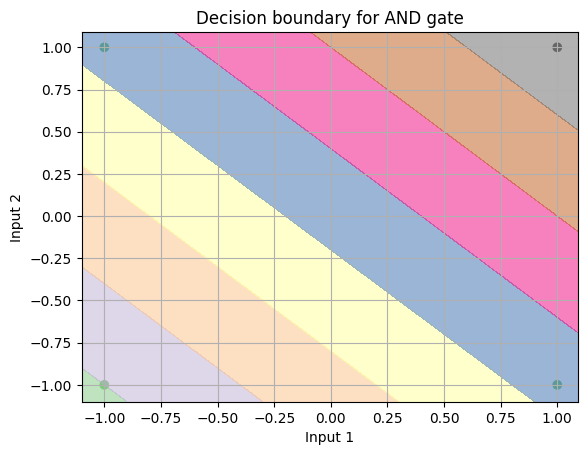

Epoch [1000/5000], Loss: 0.2500
Epoch [2000/5000], Loss: 0.2500
Epoch [3000/5000], Loss: 0.2500
Epoch [4000/5000], Loss: 0.2500
Epoch [5000/5000], Loss: 0.2500


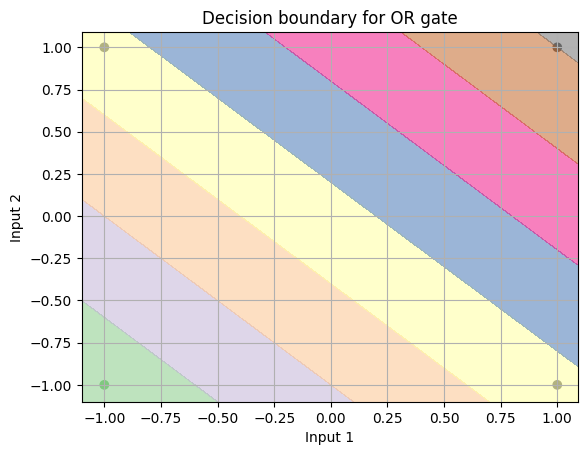

Epoch [1000/5000], Loss: 0.2500
Epoch [2000/5000], Loss: 0.2500
Epoch [3000/5000], Loss: 0.2500
Epoch [4000/5000], Loss: 0.2500
Epoch [5000/5000], Loss: 0.2500


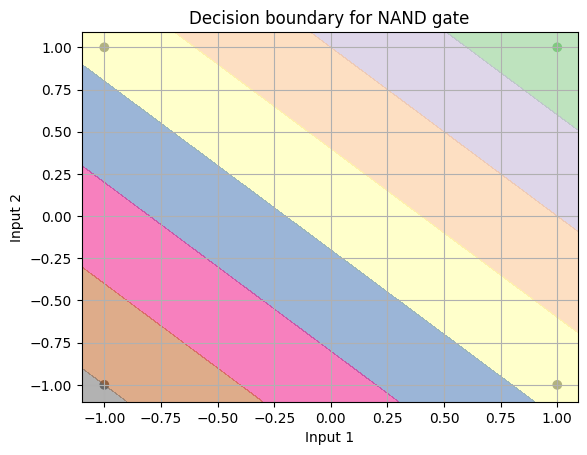

Epoch [1000/5000], Loss: 0.2500
Epoch [2000/5000], Loss: 0.2500
Epoch [3000/5000], Loss: 0.2500
Epoch [4000/5000], Loss: 0.2500
Epoch [5000/5000], Loss: 0.2500


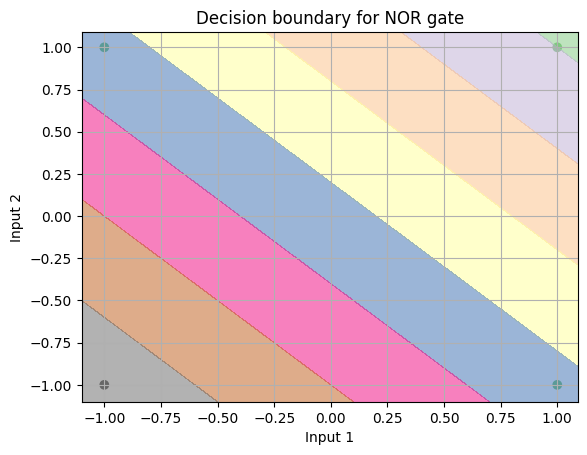

In [3]:
#3.Try removing the activation function from the MLP and rerun the code. What happens in this case?
#Can you tell why particular activation function can be used in the model architecture?
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

logic_gates = {
    "AND": {"X": torch.tensor([[-1,-1],[-1,1],[1,-1],[1,1]], dtype=torch.float), "Y": torch.tensor([[-1],[-1],[-1],[1]], dtype=torch.float)},
    "OR": {"X": torch.tensor([[-1,-1],[-1,1],[1,-1],[1,1]], dtype=torch.float), "Y": torch.tensor([[-1],[1],[1],[1]], dtype=torch.float)},
    "NAND": {"X": torch.tensor([[-1,-1],[-1,1],[1,-1],[1,1]], dtype=torch.float), "Y": torch.tensor([[1],[1],[1],[-1]], dtype=torch.float)},
    "NOR": {"X": torch.tensor([[-1,-1],[-1,1],[1,-1],[1,1]], dtype=torch.float), "Y": torch.tensor([[1],[-1],[-1],[-1]], dtype=torch.float)},
}

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

def train_and_plot(logic_gate, model, epochs=5000, lr=0.1):
    X = logic_gates[logic_gate]["X"]
    Y = logic_gates[logic_gate]["Y"]

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    plt.figure()
    X_np = X.numpy()
    Y_np = Y.numpy()
    plt.scatter(X_np[:, 0], X_np[:, 1], c=Y_np.flatten(), cmap=plt.cm.Accent, marker='o')
    plt.title(f"Decision boundary for {logic_gate} gate")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.grid(True)

    x_min, x_max = X_np[:, 0].min() - 0.1, X_np[:, 0].max() + 0.1
    y_min, y_max = X_np[:, 1].min() - 0.1, X_np[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float)).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Accent)
    plt.show()

input_size = 2
hidden_size = 3
output_size = 1

for logic_gate in logic_gates.keys():
    model = MLP(input_size, hidden_size, output_size)
    train_and_plot(logic_gate, model)
